In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with error handling
try:
    from sklearn.datasets import load_iris
    iris_data = load_iris(as_frame=True)
    df = iris_data.frame  # Create pandas DataFrame
    print("Dataset loaded successfully!\n")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print("Error occurred while loading dataset:", e)

# Display first few rows
df.head()

Dataset loaded successfully!



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [3]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
# Clean dataset if missing values exist
df = df.dropna()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Grouping by species
grouped = df.groupby("target").mean()
grouped

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


 Observation
- Species differ significantly in petal length and width, making them easy to separate visually.
- Sepal length shows an increasing trend for species with target=2 compared to others.

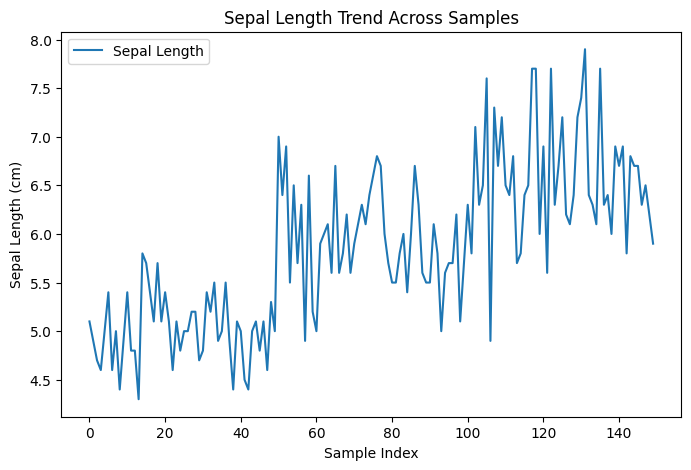

In [7]:
# 1. Line chart (trend over samples for sepal length)
plt.figure(figsize=(8,5))
plt.plot(df.index, df['sepal length (cm)'], label="Sepal Length")
plt.title("Sepal Length Trend Across Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16992\48080342.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="target", y="petal length (cm)", data=df, ci=None)


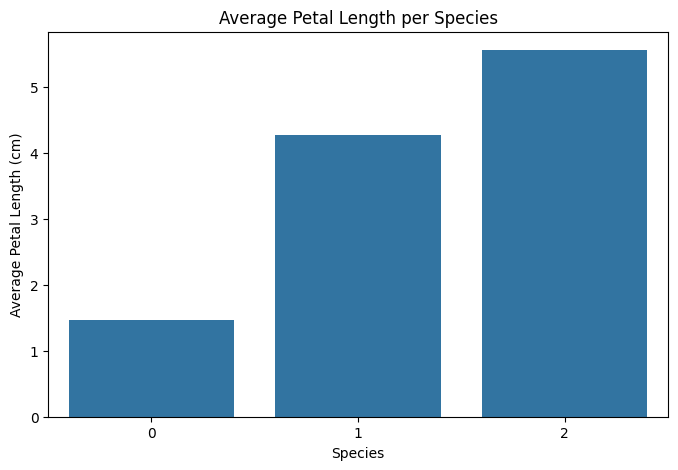

In [8]:
# 2. Bar chart (average petal length per species)
plt.figure(figsize=(8,5))
sns.barplot(x="target", y="petal length (cm)", data=df, ci=None)
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.show()

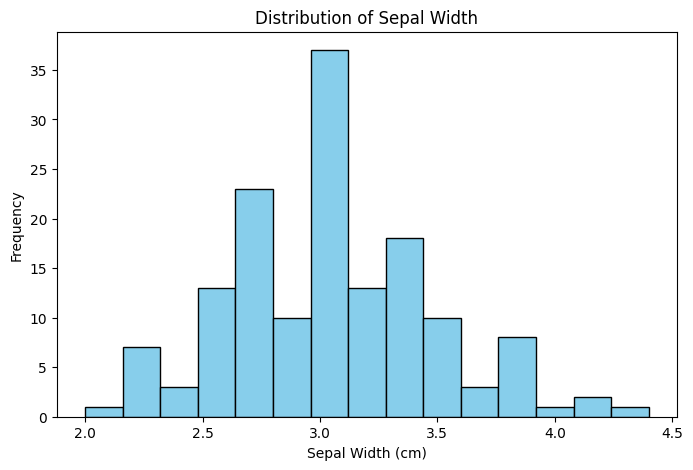

In [9]:
# 3. Histogram (distribution of sepal width)
plt.figure(figsize=(8,5))
plt.hist(df['sepal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

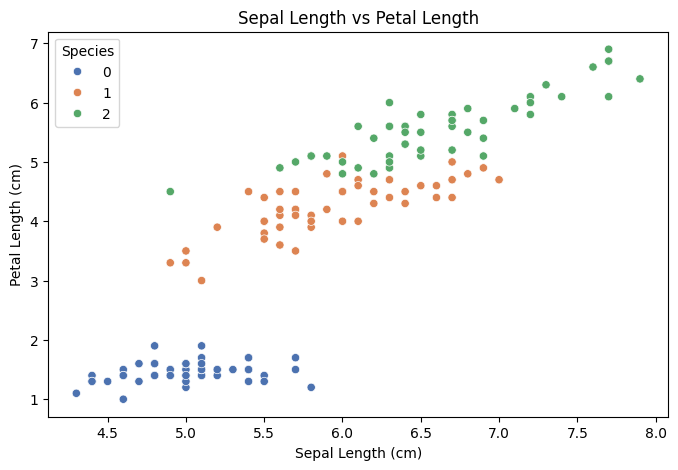

In [10]:
# 4. Scatter plot (relationship between sepal length and petal length)
plt.figure(figsize=(8,5))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="target", data=df, palette="deep")
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()

Final Findings
- Petal length and petal width clearly separate the three species.
- Sepal width shows a more normal-like distribution.
- Scatter plots show clustering of species, which explains why Iris is suitable for classification problems.